#Classifying_images_clothing
We'll build and train a neural network to classify images of clothing, like sneakers and shirts.

It's okay if you don't understand everything. This is a fast-paced overview of a complete TensorFlow program, with explanations along the way. The goal is to get the general sense of a TensorFlow project, not to catch every detail.

This notebook uses tf.keras, a high-level API to build and train models in TensorFlow.

## Install and import dependencies

In [1]:
!pip install -U tensorflow_datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
import tensorflow_datasets as tfds

import math
import numpy as np
import matplotlib.pyplot as plt

import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

print(tf.__version__)

2.8.2


In [3]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

# Import the Fashion MNIST dataset

In [56]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'],dataset['test']

In [57]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress',
               'Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

##Preprocess the data

In [58]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print('Number of training examples {}'.format(num_train_examples))
print('Number of test examples {}'.format(num_test_examples))

Number of training examples 60000
Number of test examples 10000


In [59]:
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images = images/255
    return images, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

###Explore the proprocessed data

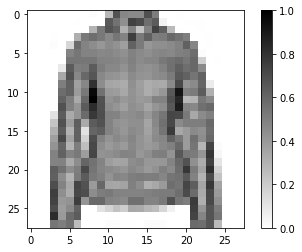

In [60]:
for image, label in test_dataset.take(1):
    break
image = image.numpy().reshape([28,28])

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

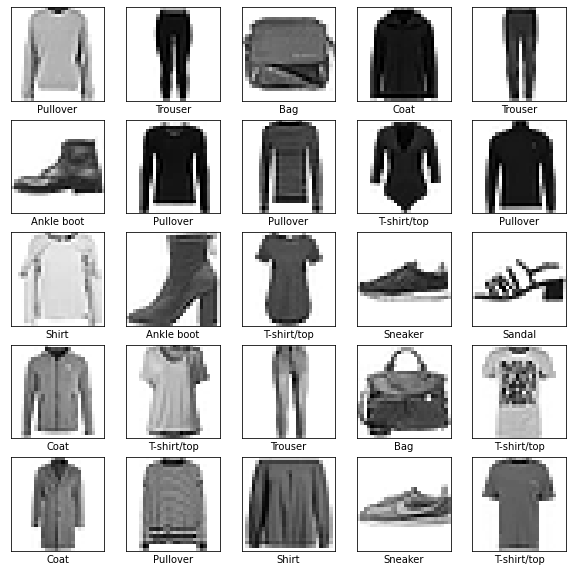

In [61]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(train_dataset.take(25)):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
plt.show()

## Build the model

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Conv2D(54, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

## Train the model


First, we define the iteration behavior for the train dataset:

1. Repeat forever by specifying dataset.repeat() (the epochs parameter described below limits how long we perform training).
2. The `dataset.shuffle(60000)` randomizes the order so our model cannot learn anything from the order of the examples.
3. And `dataset.batch(32)` tells `model.fit` to use batches of 32 images and labels when updating the model variables.

Training is performed by calling the `model.fit` method:

1. Feed the training data to the model using `train_dataset`.
2. The model learns to associate images and labels.
3. The `10` parameter limits training to 5 full iterations of the training dataset, so a total of 10 * 60000 = 6000000 examples.

In [13]:
batch_size = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(batch_size)
test_dataset = test_dataset.cache().batch(batch_size)

In [15]:
model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(num_train_examples/batch_size))

Epoch 1/10
1875/1875 [==============================] - 79s 38ms/step - loss: 0.3928 - accuracy: 0.8590
Epoch 2/10
1875/1875 [==============================] - 74s 40ms/step - loss: 0.2518 - accuracy: 0.9089
Epoch 3/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.2098 - accuracy: 0.9223
Epoch 4/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.1849 - accuracy: 0.9319
Epoch 5/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.1553 - accuracy: 0.9421
Epoch 6/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.1329 - accuracy: 0.9505
Epoch 7/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.1100 - accuracy: 0.9592
Epoch 8/10
1875/1875 [==============================] - 72s 38ms/step - loss: 0.0973 - accuracy: 0.9638
Epoch 9/10
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0819 - accuracy: 0.9692
Epoch 10/10
1875/1875 [==============================] - 73s 39m

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.97 (or 97%) on the training data.

## Evaluate accuracy
Next, compare how the model performs on the test dataset. Use all examples we have in the test dataset to assess accuracy.

In [16]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))

313/313 [==============================] - 7s 21ms/step - loss: 0.3683 - accuracy: 0.9045


In [24]:
print('Loss on test dataset: ', test_loss, '\nAccuracy on test dataset:', test_accuracy)

Loss on test dataset:  0.3682752549648285 
Accuracy on test dataset: 0.9045000076293945


## Make predictions and explore

In [25]:
for test_images, test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)

In [26]:
predictions.shape

(32, 10)

In [29]:
predictions[0]

array([1.10139155e-07, 1.95428029e-08, 1.32632926e-01, 5.83920412e-11,
       8.46641541e-01, 7.56866285e-08, 2.07248256e-02, 3.04540559e-10,
       2.54001993e-08, 4.95808933e-07], dtype=float32)

In [30]:
test_labels[0]

4

In [31]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

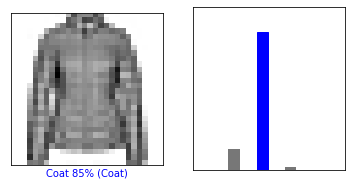

In [32]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

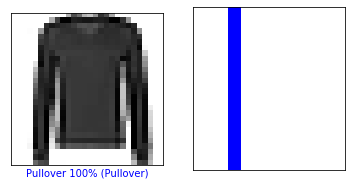

In [33]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

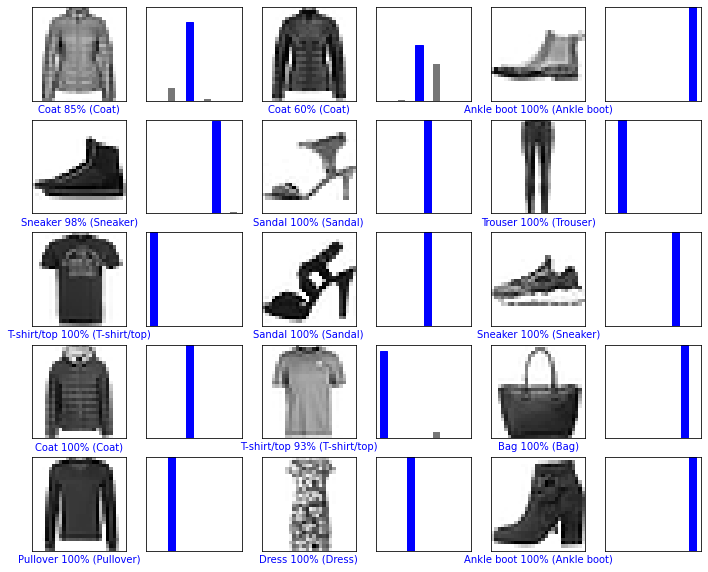

In [34]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


In [73]:
img = test_images[4]

print(img.shape)

(28, 28, 1)


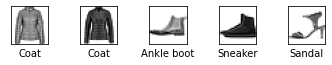

In [68]:
for i,(image, label) in enumerate(test_dataset.take(5)):
    image = image.numpy().reshape([28,28])
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])

plt.show()

We took the index of 4 image from test_images. In test sample, the index of 4 image is sandal. So, we will see if the model predicts sandal correctly.

In [74]:
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [75]:
prediction_single = model.predict(img)
print(prediction_single)

[[1.8312155e-16 5.9099749e-23 2.2122298e-18 3.2231989e-33 1.0227851e-23
  1.0000000e+00 9.9992219e-19 1.5240545e-17 2.2527726e-20 4.9841225e-17]]


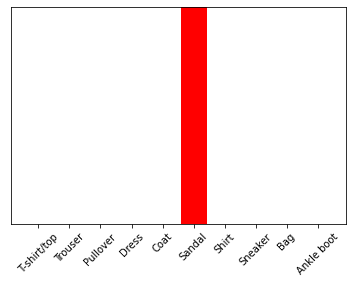

In [76]:
plot_value_array(0, prediction_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [77]:
np.argmax(prediction_single[0])

5

And, as before, the model predicts a label of 5 (sandal) correctly!

## Conclusion

The model 90% accuracy on test dataset, thus, Convolution Neural Network works better than the previous [network](https://github.com/MuhammadOo/Classifying-images-of-clothing-using-Tensorflow
) ! In the previous network, we achieved 87% accuracy.